# Lines and aesthetics

### New code
 - set a directory name for data
 - read data from a file
 - Manipulate data
 - Draw a single line chart
 - Draw a chart with multiple lines
 - Make your chart beautiful
     - Add labels (title, subtitle, x and y axes titles, rename legend)
     - Set a theme (add a pre-published one and enhance using theme())
     - Emphasise your data (where do you want to draw attention?)
     - Change colours to the ones most suitable to your data
     - Change text size and axis sequence

 

In [57]:

#install.packages("ggforce")
library(tidyverse)
install.packages("ggthemes")



Warning message:
"package 'ggthemes' is in use and will not be installed"


### Set a directory name for data

In [58]:
# Set the working directory to the folder where the pew.csv file is located
setwd("C:/Users/lukeh/Documents/College/4th-Year/Visualising_Data")

### Read data from a csv file

In [59]:
# Load the pew.csv file into a data frame called "pew"
df <- read.csv("pew.csv")

# View the first few rows of the data frame to make sure it loaded correctly
head(pew)

,religion,5000,15000,25000,35000,45000,67500,87500,125000,150000,Refused
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Agnostic,27,34,60,81,76,137,122,109,84,96
2,Atheist,12,27,37,52,35,70,73,59,74,76
3,Buddhist,27,21,30,34,33,58,62,39,53,54
4,Catholic,418,617,732,670,638,1116,949,792,633,1489
5,Dont know/refused,15,14,15,11,10,35,21,17,18,116
6,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529


In [60]:
# Load the pew.csv file into a data frame called "pew"
pew <- read.csv("pew.csv", header=TRUE)

# Rename the columns to the new names
colnames(pew) <- c("religion", "5000", "15000", "25000", "35000", "45000", "67500", "87500", "125000", "150000", "Refused")

# Drop the 'Refused' column
pew <- pew[, -which(names(pew) == "Refused")]

head(pew)

,religion,5000,15000,25000,35000,45000,67500,87500,125000,150000
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Agnostic,27,34,60,81,76,137,122,109,84
2,Atheist,12,27,37,52,35,70,73,59,74
3,Buddhist,27,21,30,34,33,58,62,39,53
4,Catholic,418,617,732,670,638,1116,949,792,633
5,Dont know/refused,15,14,15,11,10,35,21,17,18
6,Evangelical Prot,575,869,1064,982,881,1486,949,723,414


This data lists the numbers from 1 to 10, their square and their cube.  First, I will plot the linear data using a line chart

### line chart

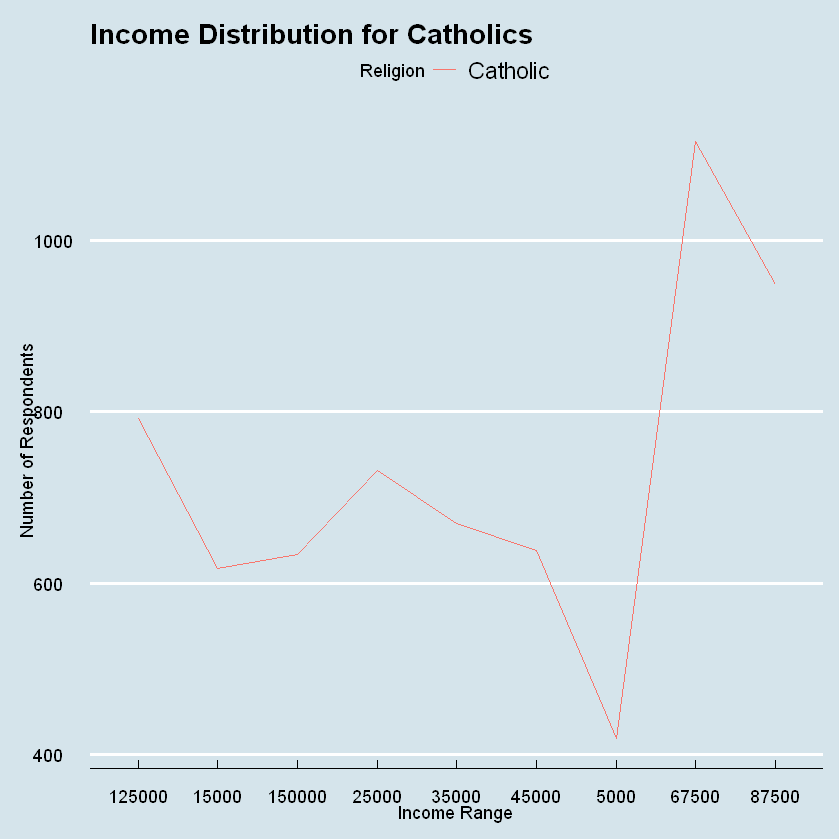

In [61]:
library(ggplot2)
library(tidyr)

# read the pew.csv file and rename the columns
pew <- read.csv("pew.csv")
colnames(pew) <- c('religion', '5000', '15000', '25000', '35000', '45000', '67500', '87500', '125000', '150000', 'Refused')

# Drop the 'Refused' column
pew <- pew[, -which(names(pew) == "Refused")]

# filter the data to only include observations for "Catholic"
pew_catholic <- filter(pew, religion == "Catholic")

# convert the data to "long" format using the gather function
pew_long <- gather(pew_catholic, key = "income", value = "count", -religion)

# create the line graph for the "Catholic" line, handling the case where there is only one data point
ggplot(pew_long, aes(x = income, y = count, group = religion, color = religion)) +
    geom_line() +
    ggtitle("Income Distribution for Catholics") +
    xlab("Income Range") +
    ylab("Number of Respondents") +
    labs(color = "Religion")



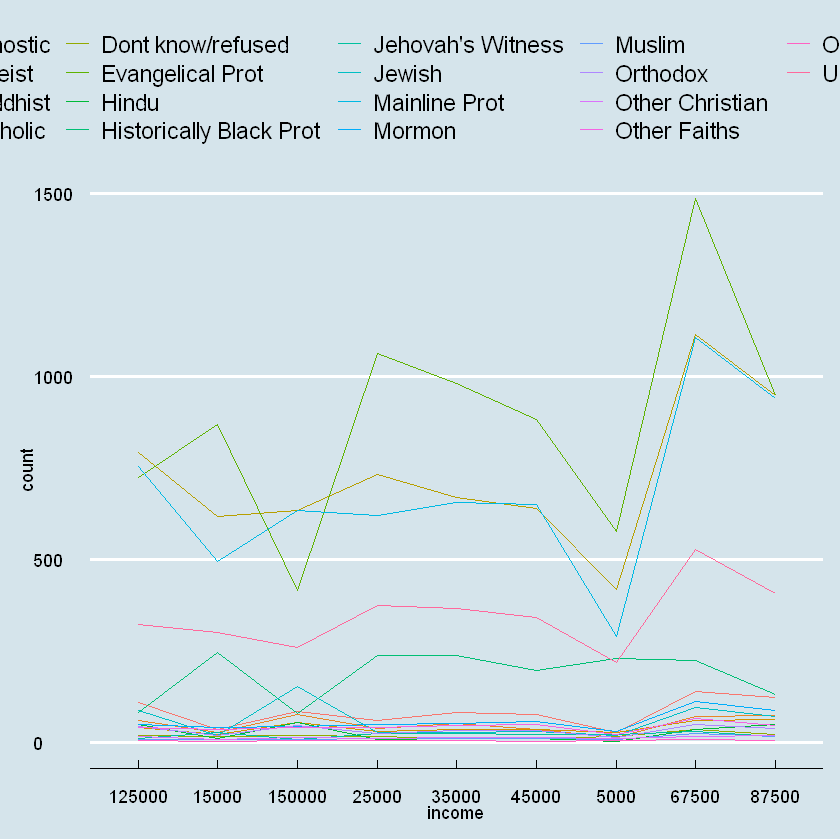

In [62]:
library(ggplot2)
library(tidyr)

# read the pew.csv file and rename the columns
pew <- read.csv("pew.csv")
colnames(pew) <- c('religion', '5000', '15000', '25000', '35000', '45000', '67500', '87500', '125000', '150000', 'Refused')

# Drop the 'Refused' column
pew <- pew[, -which(names(pew) == "Refused")]

# convert the data to "long" format using the gather function
pew_long <- gather(pew, key = "income", value = "count", -religion)

# create the line graph, grouping by religion instead of color
ggplot(pew_long, aes(x = income, y = count, group = religion, color = religion)) + 
  geom_line()


### Manipulate the data

I'd like to plot all three functions on the same chart.  I need to reshape my data so that there are three variables - the number, the function (linear, exponential or cubic) and the value.  I can use 'pivot_longer' for this.

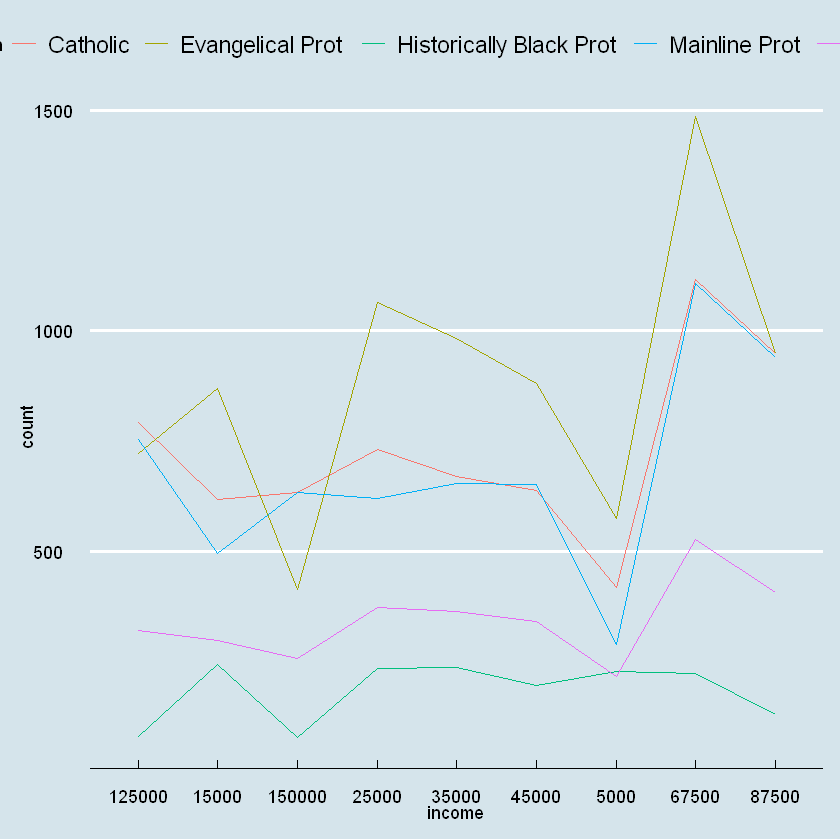

In [63]:
# pdf <- df %>% 
#   pivot_longer(
#     cols = !x, 
#     names_to = "funct", 
#     values_to = "value")
# pdf

library(dplyr)
library(tidyr)
library(ggplot2)

# read the pew.csv file and rename the columns
pew <- read.csv("pew.csv")
colnames(pew) <- c('religion', '5000', '15000', '25000', '35000', '45000', '67500', '87500', '125000', '150000', 'Refused')

# Drop the 'Refused' column
pew <- pew[, -which(names(pew) == "Refused")]

# pivot on religion and keep the top 5 religions by count
pew_long <- pew %>%
  pivot_longer(
    cols = -religion,
    names_to = "income",
    values_to = "count"
  ) %>%
  group_by(religion) %>%
  summarize(total_count = sum(count)) %>%
  slice_max(order_by = total_count, n = 5) %>%
  inner_join(pew %>%
              pivot_longer(
                cols = -religion,
                names_to = "income",
                values_to = "count"
              ), by = "religion")

# create a line graph with the group aesthetic set to religion
ggplot(pew_long, aes(x = income, y = count, group = religion, color = religion)) + 
  geom_line()


## Make your chart beautiful


### Add labels (title, subtitle, x and y axes titles, rename legend)


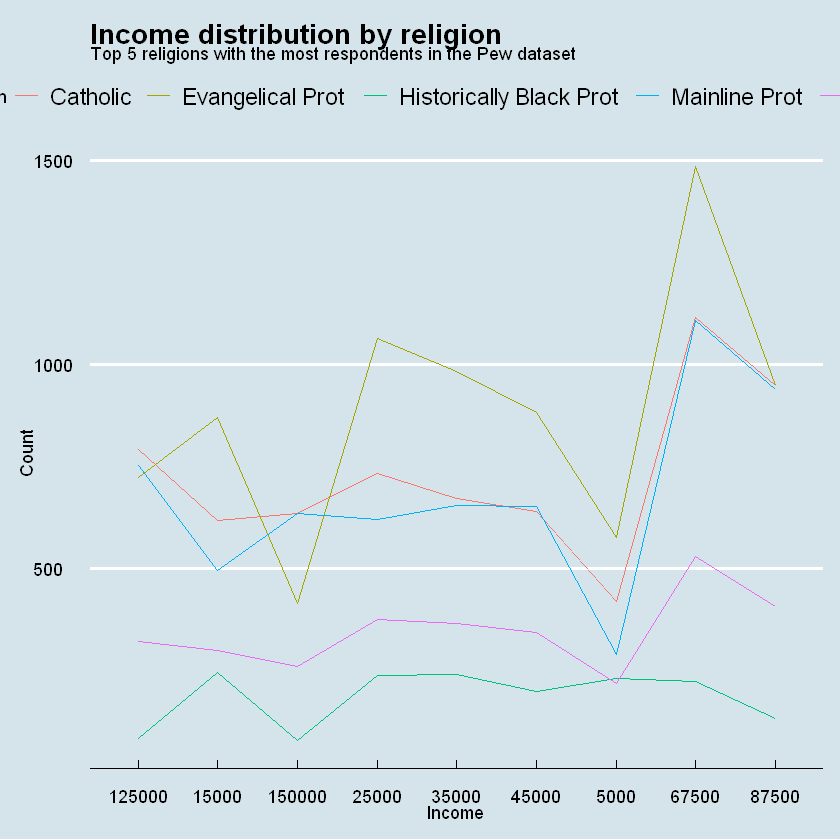

In [64]:
ggplot(pew_long, aes(x = income, y = count, group = religion, color = religion)) + 
  geom_line() +
  labs(title = "Income distribution by religion", 
       subtitle = "Top 5 religions with the most respondents in the Pew dataset", 
       x = "Income", 
       y = "Count", 
       color = "Religion")


#### Set a theme (add a pre-published one and enhance using theme())

Extra themes are available from the package ggthemes.  Be careful with themes, sometimes they take away parts of the graph that you need!

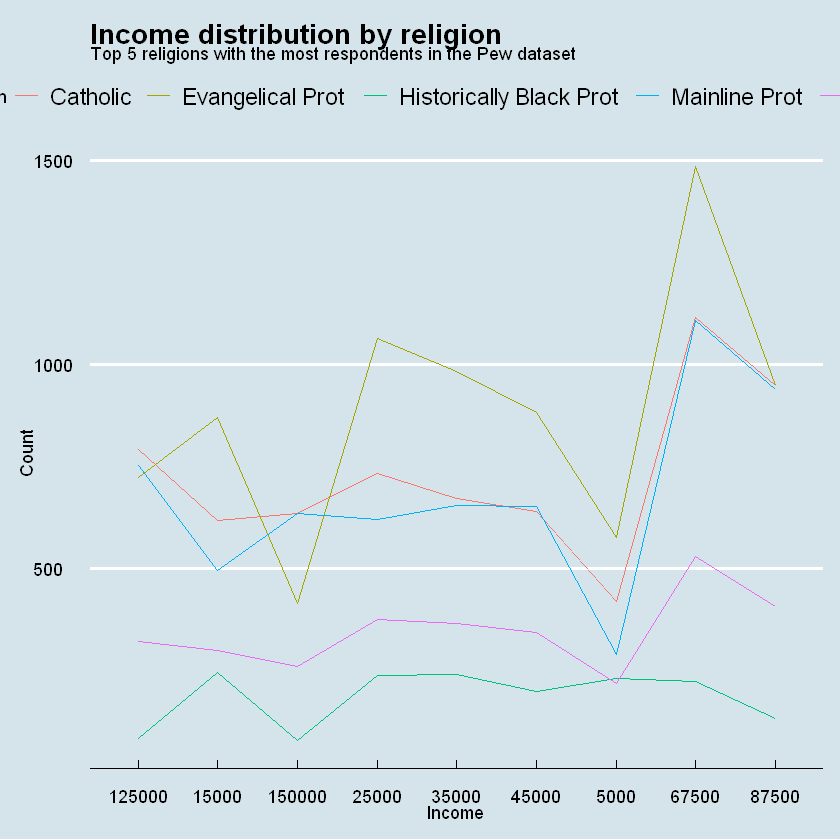

In [65]:
library(ggthemes)

# set the theme
theme_set(theme_economist())

# create the line graph with modified titles and legend
ggplot(pew_long, aes(x = income, y = count, group = religion, color = religion)) + 
  geom_line() +
  labs(title = "Income distribution by religion", 
       subtitle = "Top 5 religions with the most respondents in the Pew dataset", 
       x = "Income", 
       y = "Count", 
       color = "Religion")


Oh, it looks better, but the axis titles are gone.  Use the theme() function to put them back.

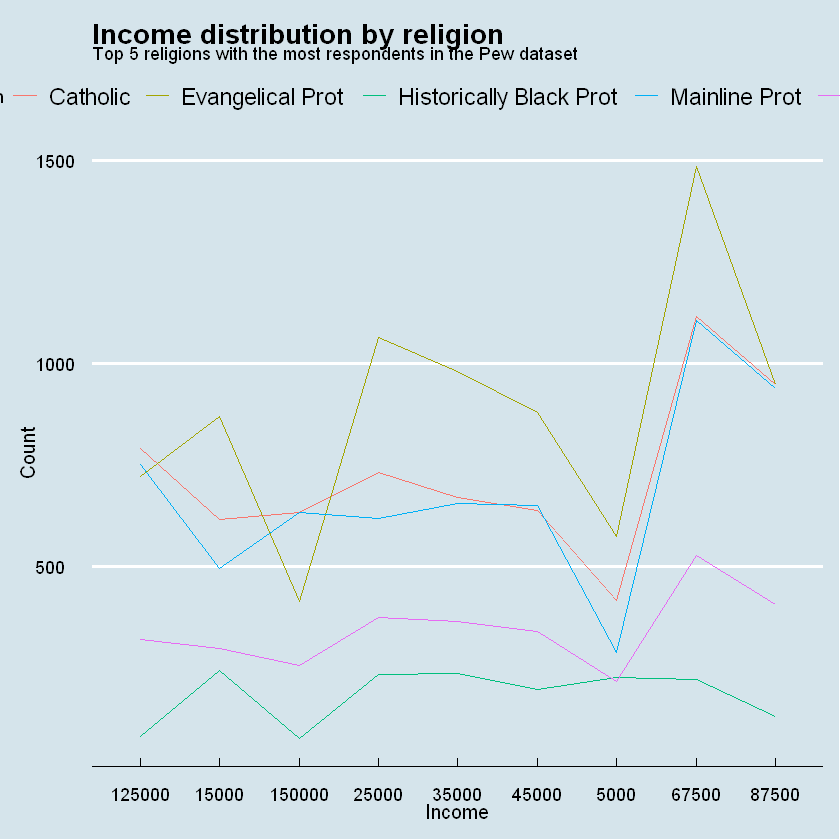

In [66]:
# create the line graph with modified titles and legend and axis names
ggplot(pew_long, aes(x = income, y = count, group = religion, color = religion)) + 
  geom_line() +
  labs(title = "Income distribution by religion", 
       subtitle = "Top 5 religions with the most respondents in the Pew dataset") +
  xlab("Income") +
  ylab("Count") +
  theme(axis.title.x = element_text(size = 12),
        axis.title.y = element_text(size = 12))


#### Emphasise your data 
Where do you want to draw attention?  The lines are all very thin.  Let's make them all thicker and change the type of line:


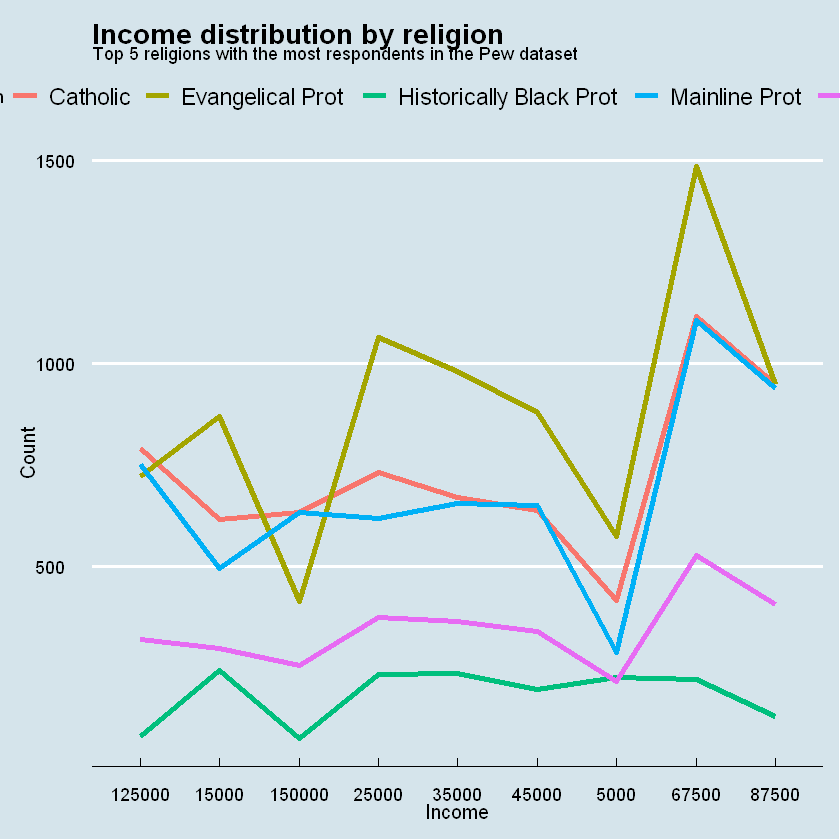

In [69]:
# create the line graph with modified titles and legend and axis names
ggplot(pew_long, aes(x = income, y = count, group = religion, color = religion)) + 
  geom_line(linewidth=1.5, linetype="solid") +
  labs(title = "Income distribution by religion", 
       subtitle = "Top 5 religions with the most respondents in the Pew dataset") +
  xlab("Income") +
  ylab("Count") +
  theme(axis.title.x = element_text(size = 12),
        axis.title.y = element_text(size = 12))


To highlight a single line, add a new column to the data and use that  to determine the line attributes.

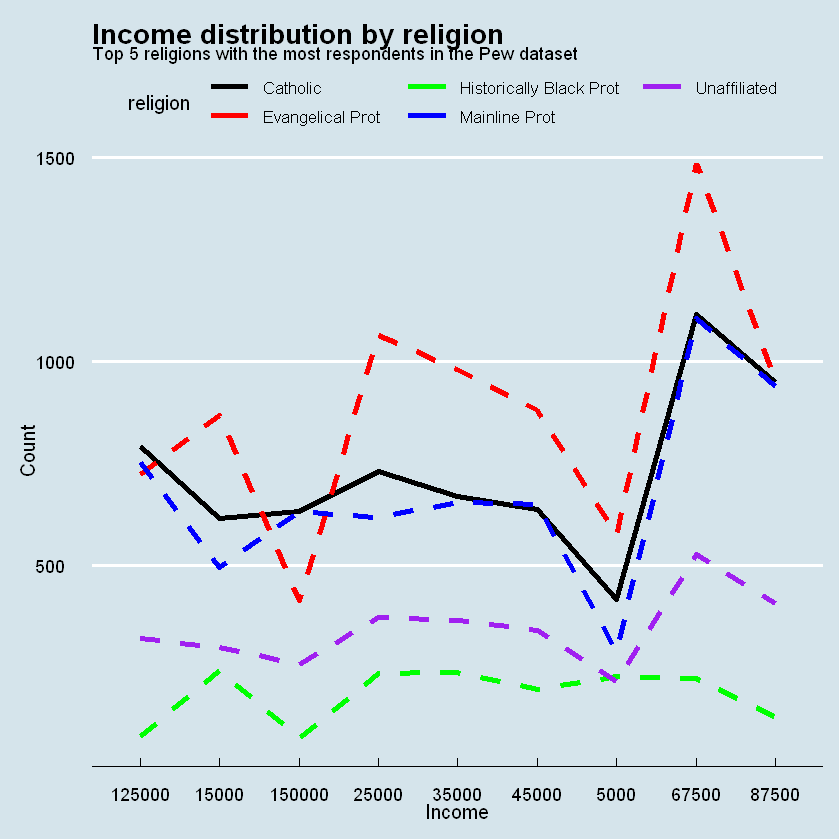

In [94]:
# create the line graph with modified titles, legend, axis names, and line attributes without isCatholic legend
ggplot(pew_long, aes(x = income, y = count, group = religion, color = religion, linetype = isCatholic)) + 
  geom_line(size = 1.5) +
  scale_linetype_manual(values = c("dashed", "solid"), guide = FALSE) +
  scale_color_manual(values = c("black", "red", "green", "blue", "purple")) +
  labs(title = "Income distribution by religion", 
       subtitle = "Top 5 religions with the most respondents in the Pew dataset") +
  xlab("Income") +
  ylab("Count") +
  theme(axis.title.x = element_text(size = 12),
        axis.title.y = element_text(size = 12),
        legend.position = "top",
        legend.box.spacing = unit(0.2, "lines"),
        legend.margin = margin(0, 0, 0, 0),
        legend.text = element_text(size = 10),
        legend.title = element_text(size = 12),
        legend.key.width = unit(1, "cm")) +
  guides(color = guide_legend(ncol = 3))
